In [2]:
import cv2
import numpy as np
import dlib
import commonfunctions as cf # this a custom module found the commonfunctions.py
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.draw import polygon
from skimage.color import rgb2gray,rgb2lab
from scipy import fftpack
from scipy.signal import convolve2d
from skimage.util import random_noise
from skimage.exposure import rescale_intensity
from skimage.morphology import binary_erosion
from skimage.morphology import disk,square,rectangle
from skimage.transform import PiecewiseAffineTransform
from skimage.transform import warp
import skimage
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
# Show the matlpotlib figures inside the notebook
%matplotlib inline

In [3]:
cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    for face in faces:
        x1 = face.left()+(face.left()*0.2)
        y1 = face.top()+(face.top()*1.1)
        x2 = face.right()+(face.right()*0.2)
        y2 = face.bottom()+(face.bottom()*0.1)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(gray, face)

        for n in range(0, 66):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(frame, (x, y), 4, (255, 0, 0), -1)
    
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

TypeError: an integer is required (got type tuple)

In [ ]:
# face_cascade = cv2.CascadeClassifier('C:\\Users\\bia3\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')

# img = cv2.imread('70289503_2447351508705408_6307667250979536896_o.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# for (x,y,w,h) in faces:
# #     right=int((x+w)+((x+w)*0.2))
# #     left=int(x+(x*0.2))
# #     top=int((y+h)+((y+h)*1.1))
# #     bottom=int(y+(y*0.1))
#     right=int(x+w)
#     left=int(x)
#     top=int((y+h))
#     bottom=int(y)
#     print(right,left,top,bottom)
#     img = cv2.rectangle(img,(left,bottom),(right,top),(255,0,0),2)
#     roi_gray = gray[bottom:top, left:right]
#     roi_color = img[bottom:top, left:right]

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:

# # set up the 68 point facial landmark detector
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# # bring in the input image
# img = cv2.imread('70289503_2447351508705408_6307667250979536896_o.jpg', 1)

# # convert to grayscale
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # detect faces in the image
# faces_in_image = detector(img_gray, 0)
# # loop through each face in image
# for face in faces_in_image:

#     # assign the facial landmarks
#     landmarks = predictor(img_gray, face)

#     # unpack the 68 landmark coordinates from the dlib object into a list 
#     landmarks_list = []
#     for i in range(0, landmarks.num_parts):
#         landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))

#     # for each landmark, plot and write number
#     for landmark_num, xy in enumerate(landmarks_list, start = 1):
#         cv2.circle(img, (xy[0], xy[1]), 12, (168, 0, 20), -1)
#         cv2.putText(img, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)


# pb=(landmarks.part(8).x,landmarks.part(8).y)
# pt=(landmarks.part(28).x,landmarks.part(28).y)
# pl=(landmarks.part(17).x,landmarks.part(17).y)
# pr=(landmarks.part(26).x,landmarks.part(26).y)

# image = cv2.imread('70289503_2447351508705408_6307667250979536896_o.jpg', 1)

# # top=int(pt[1]+pt[1]*1.1)
# # bottom=int(pb[1]+pb[1]*0.1)
# # left=int(pl[0]+pl[0]*0.2)
# # right=int(pr[0]+pr[0]*0.2)

# image = img
# r = np.array([landmarks.part(8).y,landmarks.part(28).y,landmarks.part(17).y,landmarks.part(26).y])
# c = np.array([landmarks.part(8).x,landmarks.part(28).x,landmarks.part(17).x,landmarks.part(26).x])

# rr, cc = polygon(r, c)
# img[rr, cc, 1] = 1

# left=int(pl[0]-pl[0]*0.1)
# right=pr[0]
# bottom=int(pb[1]+pb[1]*0.1)
# top=int(pt[1]-pt[1]*0.8)

# img = cv2.rectangle(img,(left,bottom),(right,top),(255,0,0),2)

# io.imshow(img)
# io.show()

# # for j in range(image.shape[1]-1):
# #         for i in range(image.shape[0]-1):
# #             if((i in range(landmarks.part(16).y,landmarks.part(3).y)) and (j in range(landmarks.part(3).x,landmarks.part(13).x))):
# #                 image[i,j]=255
# #             else:
# #                 image[i,j]=0

# # 9,29,27,18
# # visualise the image with landmarks


# io.imshow(image)  
# io.show()

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# bring in the input image
img = cv2.imread('70289503_2447351508705408_6307667250979536896_o.jpg', 1)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)
# loop through each face in image
for face in faces_in_image:

    # assign the facial landmarks
    landmarks = predictor(img_gray, face)

    # unpack the 68 landmark coordinates from the dlib object into a list 
    landmarks_list = []
    for i in range(0, landmarks.num_parts):
        landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))

    # for each landmark, plot and write number
    for landmark_num, xy in enumerate(landmarks_list, start = 1):
        cv2.circle(img, (xy[0], xy[1]), 12, (168, 0, 20), -1)
        cv2.putText(img, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)
print(landmarks_list)        
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [22]:
# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# bring in the input image
# img = cv2.imread('maxresdefault.jpg', 1)
img = cv2.imread('elip.jpg', 1)
# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)
# loop through each face in image
for face in faces_in_image:

    # assign the facial landmarks
    landmarksref = predictor(img_gray, face)

    # unpack the 68 landmark coordinates from the dlib object into a list 
    landmarks_listref = []
    for i in range(0, landmarks.num_parts):
        landmarks_listref.append((landmarksref.part(i).x, landmarksref.part(i).y))

    # for each landmark, plot and write number
    for landmark_numref, xy in enumerate(landmarks_listref, start = 1):
        cv2.circle(img, (xy[0], xy[1]), 12, (168, 0, 20), -1)
        cv2.putText(img, str(landmark_numref),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)
        
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
imgr = cv2.imread('elip.jpg', 1)
imgt = cv2.imread('bastf.jpg', 1)

imager = rgb2lab(imgr)
imaget = rgb2lab(imgt)

def wlsfilter_layer(image_orig, beta=0.2 ,lambda_=0.2):

    image = image_orig.astype(np.float)/255.0
    image1 = image.flatten(1)
    s = image.shape
    k = s[0]*s[1]

    dy = np.diff(image, 1, 0)
    dx = np.diff(image, 1, 1)
    
    dy = -beta*lambda_ / ((np.absolute(dy) ** 1.2 + 0.0001))
    dx = -beta*lambda_ / ((np.absolute(dx) ** 1.2 + 0.0001))


    dy = np.vstack((dy, np.zeros(s[1], )))
    dx = np.hstack((dx, np.zeros(s[0], )[:, np.newaxis]))

    dy = dy.flatten(1)
    dx = dx.flatten(1)
    
    d = 1 - (dx + np.roll(dx, s[0]) + dy + np.roll(dy, 1))

    a = spdiags(np.vstack((dx, dy)), [-s[0], -1], k, k)
    a = a + a.T + spdiags(d, 0, k, k)

    temp = spsolve(a, image1).reshape(s[::-1])
    
    base = np.rollaxis(temp,1)
    detail = image - base
    return (base), (detail)


st,dt = wlsfilter_layer (imaget[:,:,0]) # 0 --> lightness layer only, 1 -> a, 2 -> b
sr,dr = wlsfilter_layer (imager[:,:,0])

cv2.imshow('img',sr)
cv2.waitKey(0)
cv2.destroyAllWindows() 

# io.imshow(st)
# io.show()
# io.imshow(dt,cmap='gray')
# io.show()

# io.imshow(sr)
# io.show()
# io.imshow(dr,cmap='gray')
# io.show()

C:\Users\bia3\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\bia3\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
C:\Users\bia3\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


In [24]:

def PointInsideTriangle2(pt,poly):
    hull = cv2.convexHull(np.array(poly))
    dist = cv2.pointPolygonTest(hull,(pt[0], pt[1]),False)
    if dist>=0:
        return True
    else:
        return False

In [25]:
def cpartition(landmarks, size0, size1):

    cmat = np.zeros((size0,size1))

    left_eye = landmarks[36:41] 
    right_eye = landmarks[42:47]
    mouth = landmarks[48:67]
    lips = landmarks[48:54] + landmarks[54:60] + landmarks[61:63] + landmarks[65:67]
    skin = landmarks[0:26]

    for y in range(size0):
        for x in range(size1):
            if PointInsideTriangle2((x,y),skin):
                if PointInsideTriangle2((x,y),left_eye):
                    cmat[y][x] = 3
                elif PointInsideTriangle2((x,y),right_eye):
                    cmat[y][x] = 3
                elif PointInsideTriangle2((x,y),lips):
                    if PointInsideTriangle2((x,y),mouth):
                        cmat[y][x] = 3
                    else:
                        cmat[y][x] = 2
                else:
                    cmat[y][x] = 1

    return cmat

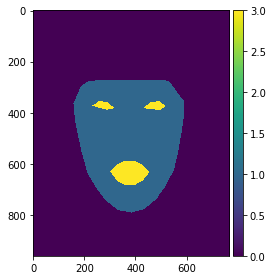

In [26]:
img = io.imread('bastf.jpg', 1)
cmatrix = cpartition(landmarks_listref,img.shape[0],img.shape[1])
io.imshow(cmatrix)

In [27]:
def shading_transfer(Is, Es, cmat):
    del_Es = cv2.Laplacian(Es,cv2.CV_64F)
    del_Is = cv2.Laplacian(Is,cv2.CV_64F)
    del_Rs = del_Is.copy()
    
    for y in range(Is.shape[0]):
        for x in range(Is.shape[1]):
            if(cmat[y][x]==1):
                beta = 1
            else:
                beta = 0
            if( beta * abs(del_Es[y][x]) > abs(del_Is[y][x])):
                del_Rs[y][x] = del_Es[y][x]
                
    return del_Rs
    

In [28]:

lap = shading_transfer(st,sr,cmatrix)
resulty = lap - st

resultd = dt + 0.5*dr

cv2.imshow('img',resultd)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
img_input, img_example

# 1
img_input, img_example = rgb2lab(imgr)

# 2


In [ ]:
def prepare_mask(mask):
    result=mask
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i][j] != 0:
                result[i][j] = 1
    mask = result
    return mask

In [ ]:
imgwer = cv2.imread('T.jpg', 1)
imgwet = cv2.imread('R.jpg', 1)

imager = rgb2lab(imgr)
imaget = rgb2lab(imgt)

mask = prepare_mask(imager[:,:,0])

cv2.imshow('img',mask)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [ ]:
def blend(img_target, img_source, img_mask, offset=(0, 0)):
    # compute regions to be blended
    region_source = (
            max(-offset[0], 0),
            max(-offset[1], 0),
            min(img_target.shape[0]-offset[0], img_source.shape[0]),
            min(img_target.shape[1]-offset[1], img_source.shape[1]))
    region_target = (
            max(offset[0], 0),
            max(offset[1], 0),
            min(img_target.shape[0], img_source.shape[0]+offset[0]),
            min(img_target.shape[1], img_source.shape[1]+offset[1]))
    region_size = (region_source[2]-region_source[0], region_source[3]-region_source[1])

    # clip and normalize mask image
    img_mask = img_mask[region_source[0]:region_source[2], region_source[1]:region_source[3]]
    img_mask = prepare_mask(img_mask)
    img_mask[img_mask==0] = False
    img_mask[img_mask!=False] = True

    # create coefficient matrix
    A = spdiags.identity(np.prod(region_size), format='lil')
    for y in range(region_size[0]):
        for x in range(region_size[1]):
            if img_mask[y,x]:
                index = x+y*region_size[1]
                A[index, index] = 4
                if index+1 < np.prod(region_size):
                    A[index, index+1] = -1
                if index-1 >= 0:
                    A[index, index-1] = -1
                if index+region_size[1] < np.prod(region_size):
                    A[index, index+region_size[1]] = -1
                if index-region_size[1] >= 0:
                    A[index, index-region_size[1]] = -1
    A = A.tocsr()
    
    # create poisson matrix for b
    P = pyamg.gallery.poisson(img_mask.shape)

    # for each layer (ex. RGB)
    for num_layer in range(img_target.shape[2]):
        # get subimages
        t = img_target[region_target[0]:region_target[2],region_target[1]:region_target[3],num_layer]
        s = img_source[region_source[0]:region_source[2], region_source[1]:region_source[3],num_layer]
        t = t.flatten()
        s = s.flatten()

        # create b
        b = P * s
        for y in range(region_size[0]):
            for x in range(region_size[1]):
                if not img_mask[y,x]:
                    index = x+y*region_size[1]
                    b[index] = t[index]

        # solve Ax = b
        x = pyamg.solve(A,b,verb=False,tol=1e-10)

        # assign x to target image
        x = np.reshape(x, region_size)
        x[x>255] = 255
        x[x<0] = 0
        x = np.array(x, img_target.dtype)
        img_target[region_target[0]:region_target[2],region_target[1]:region_target[3],num_layer] = x

    return img_target

In [ ]:
import menpo.shape as shape
import menpo.image as im

re= cv2.imread('70289503_2447351508705408_6307667250979536896_o.jpg');
ro = cv2.imread('uptown-girl-model-2.jpg', 1)
dst=[[],[]]

source = np.asarray(landmarks_listref)

target = np.asarray(landmarks_list)

# print(source)

# obj = mio.ThinPlateSplines(  )
# src =  shape.PointCloud(source)
# trg =  shape.PointCloud(target)

# imaaagee = mio.ThinPlateSplines(src,trg)
# pc = imaaagee.aligned_source()
# pv = np.asarray(pc)

# pv =  shape.PointCloud(pc)
# pv = np.asarray(pv)

# cv2.imshow('img',pv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# obj = im.BooleanImage(target)
# obj.warp_to_shape(src,warp_landmarks = True)

# ob = cv2.ThinPlateSplineShapeTransformer(landmarks_listref,landmarks_list)

# output = cv2.ShapeTransformer.warpImage(re, dst)
# cv2.getAffineTransform()




cc,h = alignImages(re,ro)
cv2.imshow('img',cc)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
re= cv2.imread('70289503_2447351508705408_6307667250979536896_o.jpg');
ro = cv2.imread('Angelina-Jolie.jpg.webp', 1)
dst=[[],[]]

source = np.asarray(landmarks_listref)

target = np.asarray(landmarks_list)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import morphops as mops
import thinplate as tps


def show_warped(img, warped):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].imshow(img[...,::-1], origin='upper')
    axs[0].scatter(c_src[:, 0]*img.shape[1], c_src[:, 1]*img.shape[0], marker='+', color='black')
    axs[1].imshow(warped[...,::-1], origin='upper')
    axs[1].scatter(c_dst[:, 0]*warped.shape[1], c_dst[:, 1]*warped.shape[0], marker='+', color='black')
    plt.show()


def warp_image_cv(img, c_src, c_dst, dshape=None):
    dshape = dshape or img.shape
    theta = tps.tps_theta_from_points(c_src, c_dst, reduced=True)
    grid = tps.tps_grid(theta, c_dst, dshape)
    mapx, mapy = tps.tps_grid_to_remap(grid, img.shape)
    return cv2.remap(img, mapx, mapy, cv2.INTER_CUBIC)

warped = warp_image_cv(ro,source,target)
show_warped(warped,img)

In [ ]:
import numpy as np
import warnings
import matplotlib.pylab as pyp
import math
from PIL import Image


"""
    Anisotropic diffusion.
    
    Cian Conway - 10126767
    Patrick Stapleton - 10122834
    Ivan McCaffrey - 10098119
    
"""


resultImage = io.imread('70289503_2447351508705408_6307667250979536896_o.jpg')  ## Specify the original file path

im_min, im_max = resultImage.min(), resultImage.max()

print ("Original image:", resultImage.shape, resultImage.dtype, im_min, im_max)
resultImage = (resultImage - im_min) / (float)(im_max - im_min)   ## Conversion
print ("Perona-Malik Anisotropic Diffusion:", resultImage.shape, resultImage.dtype, resultImage.min(), resultImage.max())

pyp.figure('Image BEFORE Perona-Malik anisotropic diffusion')
pyp.imshow(resultImage, cmap='gray')
pyp.axis('on')


pyp.show() #Display image

"""
    ****Stopping Functions*****
    Alternate Stopping Function
    def f(lam,b): 
        func = 1/(1 + ((lam/b)**2))
        return func
    
"""
def f(lam,b):
    return np.exp(-1* (np.power(lam,2))/(np.power(b,2)))

def anisodiff(im, steps, b, lam = 0.25):  #takes image input, the number of iterations, 
    

    im_new = np.zeros(im.shape, dtype=im.dtype) 
    for t in range(steps): 
        dn = im[:-2,1:-1] - im[1:-1,1:-1] 
        ds = im[2:,1:-1] - im[1:-1,1:-1] 
        de = im[1:-1,2:] - im[1:-1,1:-1] 
        dw = im[1:-1,:-2] - im[1:-1,1:-1] 
        im_new[1:-1,1:-1] = im[1:-1,1:-1] +\
                            lam * (f(dn,b)*dn + f (ds,b)*ds + 
                                    f (de,b)*de + f (dw,b)*dw) 
        im = im_new 
    return im
  

im2 = anisodiff(resultImage, 60, 0.15, 0.15)
pyp.figure('Image AFTER Perona-Malik anisotropic diffusion')
pyp.imshow(im2, cmap='gray')
pyp.axis('on')


pyp.show()

In [ ]:
selem = rectangle(4,5)
gray_img = rgb2gray(im2)

# im1 = image.filter(ImageFilter.BLUR)
# blurred_face = ndimage.gaussian_filter(gray_img, sigma=3)

io.imshow(im2)
io.show()

for j in range(gray_img.shape[1]-1):
        for i in range(gray_img.shape[0]-1):
            if(im2[i,j] < 1):
                im2[i,j]=0
                
io.imshow(im2)
io.show()                

In [ ]:
# img = io.imread('79111184_1304227093298684_6593981148299264000_n.jpg')
# print(img.shape[0],img.shape[1])
# D=10
# h=img.shape[0]
# w=img.shape[1]

# def detect_faces(cascade, test_image, scaleFactor = 1.1):
#     # create a copy of the image to prevent any changes to the original one.
#     image_copy = test_image.copy()

#     #convert the test image to gray scale as opencv face detector expects gray images
#     gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

#     # Applying the haar classifier to detect faces
#     faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

#     for (x, y, w, h) in faces_rect:
#         cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

#     return image_copy


In [ ]:
# original_image = cv2.imread('79111184_1304227093298684_6593981148299264000_n.jpg')

# # Convert color image to grayscale for Viola-Jones
# grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# face_cascade = cv2.CascadeClassifier('path/to/haarcascade_frontalface_alt.xml')

# detected_faces = face_cascade.detectMultiScale(grayscale_image)

# for (column, row, width, height) in detected_faces:
#     cv.rectangle(
#         original_image,
#         (column, row),
#         (column + width, row + height),
#         (0, 255, 0),
#         2
#     )
    
# cv.imshow('Image', original_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [ ]:
#  #loading image
# haar_face_cascade = cv2.CascadeClassifier('data/haarcascade/haarcascade_frontalface_default.xml')

# test_image = cv2.imread('79111184_1304227093298684_6593981148299264000_n.jpg')

#   # Converting to grayscale
# test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#   # Displaying grayscale image
# plt.imshow(test_image_gray, cmap='gray')

# #call the function to detect faces
# faces = detect_faces(haar_face_cascade, test_image2)

#  #convert to RGB and display image
# plt.imshow(convertToRGB(faces))